In [2]:
#Import libraries and dataset
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
# Load the IMDB dataset
vocab_size = 10000  # Use the top 10,000 words
maxlen = 200  # Maximum length of each review

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [5]:
#Preprocess the Text Data (Tokenization, Padding)
# Pad sequences to ensure all reviews have the same length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


**LSTM Network**

A long short-term memory network is a type of recurrent neural network (RNN). LSTMs are predominantly used to learn, process, and classify sequential data because these networks can learn long-term dependencies between time steps of data.

**Architecture**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(128),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
# Display the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 200, 128)          131584    
                                                                 
 dropout (Dropout)           (None, 200, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1543297 (5.89 MB)
Trainable params: 154329

In [10]:
#rain and Evaluate the Model

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
196/196 [==============================] - 423s 2s/step - loss: 0.4336 - accuracy: 0.7932 - val_loss: 0.3295 - val_accuracy: 0.8639
Epoch 2/10
196/196 [==============================] - 409s 2s/step - loss: 0.2604 - accuracy: 0.8990 - val_loss: 0.3231 - val_accuracy: 0.8650
Epoch 3/10
196/196 [==============================] - 412s 2s/step - loss: 0.1980 - accuracy: 0.9262 - val_loss: 0.4046 - val_accuracy: 0.8461
Epoch 4/10
196/196 [==============================] - 417s 2s/step - loss: 0.1436 - accuracy: 0.9492 - val_loss: 0.4193 - val_accuracy: 0.8488
Epoch 5/10
196/196 [==============================] - 448s 2s/step - loss: 0.1329 - accuracy: 0.9532 - val_loss: 0.4182 - val_accuracy: 0.8528
Epoch 6/10
196/196 [==============================] - 356s 2s/step - loss: 0.0924 - accuracy: 0.9689 - val_loss: 0.5231 - val_accuracy: 0.8536
Epoch 7/10
196/196 [==============================] - 409s 2s/step - loss: 0.0644 - accuracy: 0.9790 - val_loss: 0.5558 - val_accuracy: 0.8460

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')


782/782 [==============================] - 168s 215ms/step - loss: 0.6720 - accuracy: 0.8444
Test accuracy: 0.8444


In [14]:
model.save('lstm_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Analyze the Impact of Hyperparameters**

Experiment with different hyperparameters and compare the performance.

In [12]:
# Example: Changing the number of LSTM units and dropout rate
model2 = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

# Train and evaluate the modified model
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)
print(f'Test accuracy of modified model: {test_accuracy2:.4f}')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 lstm_2 (LSTM)               (None, 200, 64)           49408     
                                                                 
 dropout_2 (Dropout)         (None, 200, 64)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1362497 (5.20 MB)
Trainable params: 1362

In [15]:
model.save('lstm_model2.h5')

Model Comparision

Model 1: LSTM(128) + LSTM(128), Dropout(0.5)
Test Accuracy: 0.8444

Model 2: LSTM(64) + LSTM(64), Dropout(0.3)
Test Accuracy: 0.8471



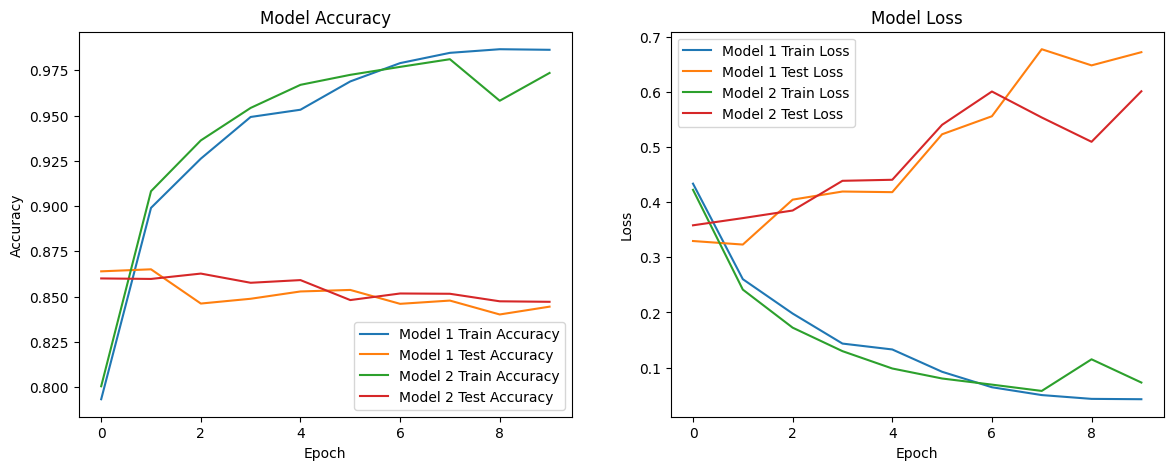

In [16]:
import matplotlib.pyplot as plt

# Function to compare models
def compare_models(history1, test_accuracy1, history2, test_accuracy2):
    print("Model 1: LSTM(128) + LSTM(128), Dropout(0.5)")
    print(f"Test Accuracy: {test_accuracy1:.4f}\n")
    print("Model 2: LSTM(64) + LSTM(64), Dropout(0.3)")
    print(f"Test Accuracy: {test_accuracy2:.4f}\n")

    plt.figure(figsize=(14, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label='Model 1 Train Accuracy')
    plt.plot(history1.history['val_accuracy'], label='Model 1 Test Accuracy')
    plt.plot(history2.history['accuracy'], label='Model 2 Train Accuracy')
    plt.plot(history2.history['val_accuracy'], label='Model 2 Test Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label='Model 1 Train Loss')
    plt.plot(history1.history['val_loss'], label='Model 1 Test Loss')
    plt.plot(history2.history['loss'], label='Model 2 Train Loss')
    plt.plot(history2.history['val_loss'], label='Model 2 Test Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


compare_models(history, test_accuracy, history2, test_accuracy2)

**Testing a new Review**

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer

# Load the trained model
model = load_model('lstm_model1.h5')

# Define the function to preprocess and predict the sentiment of a new review
def predict_sentiment(review, model, tokenizer, maxlen):
    # Tokenize and pad the review
    sequences = tokenizer.texts_to_sequences([review])
    padded_sequences = pad_sequences(sequences, maxlen=maxlen)

    # Predict the sentiment
    prediction = model.predict(padded_sequences)[0][0]

    # Return the sentiment
    return 'Positive' if prediction >= 0.5 else 'Negative'

# Example usage
# Assuming the tokenizer has been fitted on the training data
# Recreate the tokenizer
vocab_size = 10000  # Use the same vocabulary size as during training
tokenizer = Tokenizer(num_words=vocab_size)
(X_train, _), (_, _) = imdb.load_data(num_words=vocab_size)
tokenizer.fit_on_texts(imdb.get_word_index().keys())

# Test the function with a new review
new_review = "This movie was fantastic! The performances were stellar and the storyline was gripping."
sentiment = predict_sentiment(new_review, model, tokenizer, maxlen)
print(f'Review: {new_review}')
print(f'Sentiment: {sentiment}')


1/1 [==============================] - 1s 879ms/step
Review: This movie was fantastic! The performances were stellar and the storyline was gripping.
Sentiment: Positive
